In [12]:
#### Notebook 2019-07-30 23:37CT by Joshua Yao-Yu Lin

import torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from  torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision.models as models
import lenstronomy.Util.image_util as image_util
import os, sys
import pandas as pd
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc
import datetime
from tensorboardX import SummaryWriter

In [13]:
root_folder = "/media/joshua/HDD_fun2/time_delay_challenge/Fourth_sims/"
train_folder = "train/"
test_folder = "test/"
train_data = pd.read_csv(root_folder + train_folder + "lens_info.csv")
test_data = pd.read_csv(root_folder + test_folder + "lens_info.csv")

EHT_test_path = root_folder + test_folder
files = os.listdir(EHT_test_path)
loaded_model_path = './saved_model/2019-08-15power_law_pred_resnet18.mdl'


if os.path.exists(loaded_model_path):
    net = torch.load(loaded_model_path)
    print('loaded mdl！')
else:
    print('No model to load. Should stop!')
    
print(os.getcwd()) 


normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
data_transform = transforms.Compose([
            transforms.ToTensor(), # scale to [0,1] and convert to tensor
            normalize,
            ])
target_transform = torch.Tensor

loaded mdl！
/home/joshua/Documents/git_work_zone/time_delay_challenge


In [14]:
glo_batch_size = 1
test_num_batch = 1



class DeepLenstronomyDataset(Dataset): # torch.utils.data.Dataset
    def __init__(self, root_dir, train=True, transform=None, target_transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.target_transform = target_transform
        self.train = train  # training set or test set
        self.train_folder = 'train'#'data_train'
        self.test_folder = 'test'#'data_test'
        #self.df = pd.read_csv('../input/clean-full-train/clean_full_data.csv') #+ '/clean_full_data.csv')


        if self.train:
            self.path = os.path.join(self.root_dir, self.train_folder)
            self.df = pd.read_csv(self.path + '/lens_info.csv')


            #self.length = TRAINING_SAMPLES
        else:
            self.path = os.path.join(self.root_dir, self.test_folder)
            self.df = pd.read_csv(self.path + '/lens_info.csv')
            #self.length = TESTING_SAMPLES

    def __getitem__(self, index):
        #   gamma  center_x  center_y        e1        e2  source_x  source_y  gamma_ext  psi_ext
        #print(self.df['name'].iloc[[index]])
        name = self.df['name'].iloc[[index]]
        theta_E = self.df['theta_E'].iloc[[index]]
        gamma = self.df['gamma'].iloc[[index]]
        center_x = self.df['center_x'].iloc[[index]]
        center_y = self.df['center_y'].iloc[[index]]
        e1 = self.df['e1'].iloc[[index]]
        e2 = self.df['e2'].iloc[[index]]
        source_x = self.df['source_x'].iloc[[index]]
        source_y = self.df['source_y'].iloc[[index]]
        gamma_ext = self.df['gamma_ext'].iloc[[index]]
        psi_ext = self.df['psi_ext'].iloc[[index]]
        img_path = self.path + "/" + str(name.values[0]) + ".npy"
        img = np.load(img_path)
        img = scipy.ndimage.zoom(img, 224/99, order=1)
        image = np.zeros((3, 224, 224))
        for i in range(3):
            image[i, :, :] += img
        return image, theta_E.values, gamma.values, center_x.values, center_y.values, e1.values, e2.values, source_x.values, source_y.values, gamma_ext.values, psi_ext.values


    def __len__(self):
        return self.df.shape[0]
    
train_loader = torch.utils.data.DataLoader(DeepLenstronomyDataset(root_folder, train=True, transform=data_transform, target_transform=target_transform),
                    batch_size = glo_batch_size, shuffle = True
                    )

test_loader = torch.utils.data.DataLoader(DeepLenstronomyDataset(root_folder, train=False, transform=data_transform, target_transform=target_transform),
            batch_size = glo_batch_size, shuffle = True
            )

lens parameters: theta_E, e1, e2(ground trouth) 0.7786568690142 0.14434939678830624 0.2306691406312276
lens parameters: theta_E, e1, e2(prediction): 0.7267996 0.030992614 0.03199689
source positions(ground trouth) -0.02480987465971257 -0.04482275538813117
source positions(prediction): 0.040430978 -0.034223743
lens parameters: gamma, center_x, center_y(ground trouth) 2.0711081528038693 0.11699972011559115 0.20416302706954376
parameters: gamma, center_x, center_y(prediction): 2.0693316 0.22882637 0.24502718


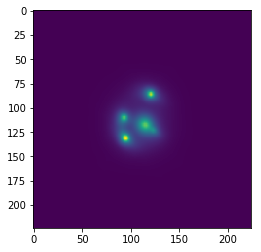

lens parameters: theta_E, e1, e2(ground trouth) 1.2829272680574288 -0.08153182245948938 0.2678954169679744
lens parameters: theta_E, e1, e2(prediction): 1.2192969 -0.14872667 0.24697053
source positions(ground trouth) 0.023045521836636367 -0.16236638167985465
source positions(prediction): 0.061455436 -0.13202868
lens parameters: gamma, center_x, center_y(ground trouth) 1.942216015087915 -0.08922355190330157 0.30668884948088754
parameters: gamma, center_x, center_y(prediction): 2.0080287 0.041962754 0.3924328


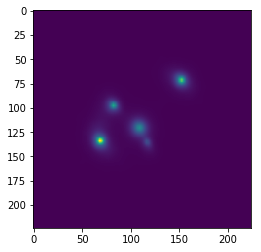

lens parameters: theta_E, e1, e2(ground trouth) 1.419252719514203 0.07734199682285205 0.0681523733999432
lens parameters: theta_E, e1, e2(prediction): 1.362936 0.020879218 0.039871603
source positions(ground trouth) -0.00417063894402596 0.011065177001290626
source positions(prediction): 0.00731965 -0.02181837
lens parameters: gamma, center_x, center_y(ground trouth) 1.9428558703556773 0.14533695637876295 -0.04526132409251973
parameters: gamma, center_x, center_y(prediction): 1.9928383 0.25786394 -0.026618706


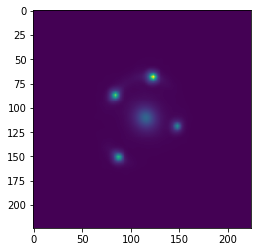

lens parameters: theta_E, e1, e2(ground trouth) 1.0395706047505775 0.05778108998770778 -0.0689041312012224
lens parameters: theta_E, e1, e2(prediction): 0.954681 0.0016030464 -0.11769293
source positions(ground trouth) -0.041128893279912336 -0.007666275973743642
source positions(prediction): 0.0043054954 0.049255013
lens parameters: gamma, center_x, center_y(ground trouth) 1.9902425972008544 -0.23489703464014106 -0.08010938766960701
parameters: gamma, center_x, center_y(prediction): 2.0504403 -0.11330239 -0.11101861


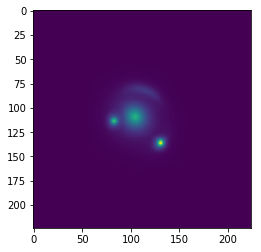

lens parameters: theta_E, e1, e2(ground trouth) 0.753226957571455 0.11887100601336945 0.01698540021054476
lens parameters: theta_E, e1, e2(prediction): 0.77887785 0.032698996 -0.019357145
source positions(ground trouth) -0.07897171520281958 0.030362692485904376
source positions(prediction): -0.03954266 0.0036919415
lens parameters: gamma, center_x, center_y(ground trouth) 1.921761551244716 0.2673680582869537 0.023770764573309542
parameters: gamma, center_x, center_y(prediction): 2.0421991 0.3129114 -0.0124415625


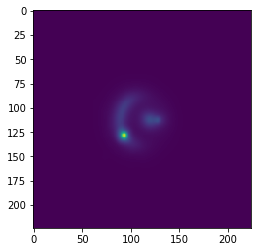

lens parameters: theta_E, e1, e2(ground trouth) 1.1983686060423475 -0.09049132526631304 0.0674468964343214
lens parameters: theta_E, e1, e2(prediction): 1.1560434 -0.08103268 -0.0069080517
source positions(ground trouth) -0.14894755175421714 0.03259251709088947
source positions(prediction): -0.118872434 0.055845357
lens parameters: gamma, center_x, center_y(ground trouth) 2.0291841621789115 -0.2723347963186832 0.037303633754277615
parameters: gamma, center_x, center_y(prediction): 2.0645251 -0.18705449 0.01688478


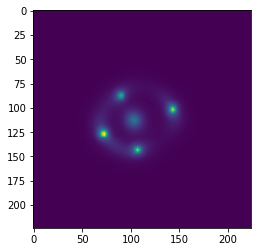

lens parameters: theta_E, e1, e2(ground trouth) 1.4319143158346872 -0.029843943830891225 0.15684509978492048
lens parameters: theta_E, e1, e2(prediction): 1.3919923 -0.029142277 0.117413044
source positions(ground trouth) -0.03406110801690169 0.02010396387057125
source positions(prediction): 0.028168304 0.021815967
lens parameters: gamma, center_x, center_y(ground trouth) 1.8775053743565544 -0.1310147020793386 0.012663355413402964
parameters: gamma, center_x, center_y(prediction): 1.9959255 -0.012174366 0.018797694


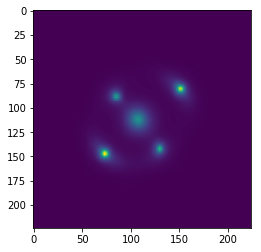

lens parameters: theta_E, e1, e2(ground trouth) 1.0272345328672003 -0.02691045808080765 0.16666638416390606
lens parameters: theta_E, e1, e2(prediction): 1.0016997 -0.07138896 0.1001314
source positions(ground trouth) 0.00936311274234787 -0.1225551718568777
source positions(prediction): 0.0017698617 -0.057472955
lens parameters: gamma, center_x, center_y(ground trouth) 2.030149492850641 0.06280872576074922 0.2502925073881798
parameters: gamma, center_x, center_y(prediction): 2.0804114 0.22115943 0.22923827


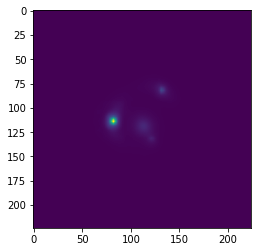

lens parameters: theta_E, e1, e2(ground trouth) 1.3765027136825596 -0.3549779915128913 -0.09394754382398336
lens parameters: theta_E, e1, e2(prediction): 1.3253697 -0.35794458 -0.14000732
source positions(ground trouth) -0.028560011690745724 -0.027823544435790597
source positions(prediction): 0.0306257 0.0027948506
lens parameters: gamma, center_x, center_y(ground trouth) 2.0287495179884383 0.33419659421140235 0.11712220840530363
parameters: gamma, center_x, center_y(prediction): 2.1040938 0.47273493 0.14144753


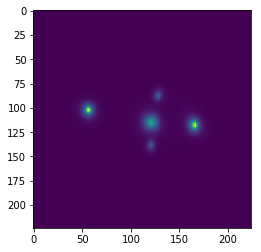

lens parameters: theta_E, e1, e2(ground trouth) 1.468645337732282 0.014692559059452331 0.17310349446711806
lens parameters: theta_E, e1, e2(prediction): 1.3731 -0.012372127 0.1672186
source positions(ground trouth) -0.16457468557877086 -0.02428055413894601
source positions(prediction): -0.10981259 -0.032152295
lens parameters: gamma, center_x, center_y(ground trouth) 1.8599940431621091 0.1213204883124977 -0.20834750514688008
parameters: gamma, center_x, center_y(prediction): 1.9351672 0.25777572 -0.19569305


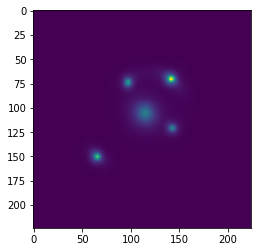

lens parameters: theta_E, e1, e2(ground trouth) 1.0748204426048265 0.15488762881060672 0.034282978961237984
lens parameters: theta_E, e1, e2(prediction): 1.0486497 0.0773652 -0.07699969
source positions(ground trouth) 0.2781084032337859 0.11204680672669323
source positions(prediction): 0.20037656 0.058183007
lens parameters: gamma, center_x, center_y(ground trouth) 2.1664039679834057 0.009089465248596306 -0.15992128756653806
parameters: gamma, center_x, center_y(prediction): 2.0887434 0.10478204 -0.17980167


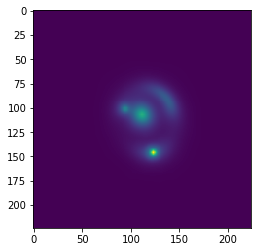

lens parameters: theta_E, e1, e2(ground trouth) 1.3922958771630518 0.2516997674999398 0.006339499179933344
lens parameters: theta_E, e1, e2(prediction): 1.2907631 0.17658 -0.040532067
source positions(ground trouth) -0.13890269520484955 -0.056451083613447174
source positions(prediction): -0.13984694 -0.027580086
lens parameters: gamma, center_x, center_y(ground trouth) 2.162504862879993 -0.14820290290991192 -0.14366720316477227
parameters: gamma, center_x, center_y(prediction): 2.1611166 -0.023847355 -0.17607957


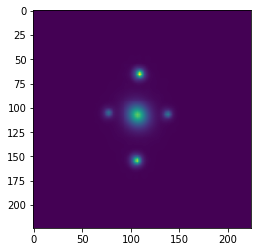

lens parameters: theta_E, e1, e2(ground trouth) 1.1005700650494183 0.2478194717116541 -0.08873052095267328
lens parameters: theta_E, e1, e2(prediction): 1.0414085 0.18304193 -0.13164623
source positions(ground trouth) 0.08630192597408087 -0.12689823778345105
source positions(prediction): 0.07982381 -0.08652902
lens parameters: gamma, center_x, center_y(ground trouth) 2.0272373312200607 -0.08828936611547071 -0.2484829743919281
parameters: gamma, center_x, center_y(prediction): 2.029785 0.05591213 -0.23689952


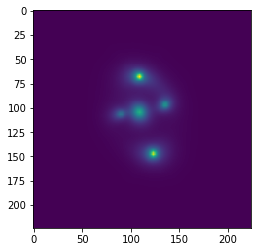

lens parameters: theta_E, e1, e2(ground trouth) 1.494831988969541 0.07799243928100884 -0.18945802063005454
lens parameters: theta_E, e1, e2(prediction): 1.2995322 0.03167089 -0.17419372
source positions(ground trouth) -0.2721448584322336 -0.041580308837033016
source positions(prediction): -0.21824221 0.026168242
lens parameters: gamma, center_x, center_y(ground trouth) 2.078280472269165 -0.03901368961446211 -0.40014111027455296
parameters: gamma, center_x, center_y(prediction): 1.9921542 0.11570277 -0.44433868


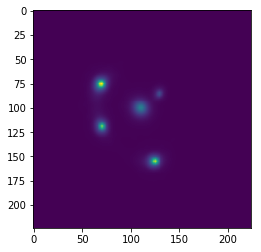

lens parameters: theta_E, e1, e2(ground trouth) 1.162925215235974 0.0625693592932627 0.3249112868685041
lens parameters: theta_E, e1, e2(prediction): 0.9963974 0.030387463 0.22449219
source positions(ground trouth) -0.06946938605273052 0.039616161534804635
source positions(prediction): -0.064978704 0.086095855
lens parameters: gamma, center_x, center_y(ground trouth) 2.0713879910687654 0.07393579840870634 0.03340153878154792
parameters: gamma, center_x, center_y(prediction): 2.1242857 0.16387235 0.027567817


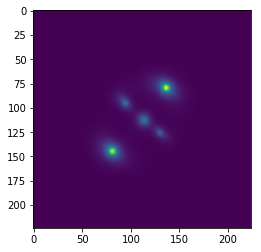

lens parameters: theta_E, e1, e2(ground trouth) 1.3526939341712254 -0.10782012285347882 -0.3377783992743057
lens parameters: theta_E, e1, e2(prediction): 1.3099494 -0.1534491 -0.36011487
source positions(ground trouth) -0.0026398901239260467 -0.019630750458641037
source positions(prediction): -0.009374047 0.064007886
lens parameters: gamma, center_x, center_y(ground trouth) 1.9707152516434605 -0.3313481026772312 -0.5670600512289662
parameters: gamma, center_x, center_y(prediction): 2.0263908 -0.18713568 -0.4653759


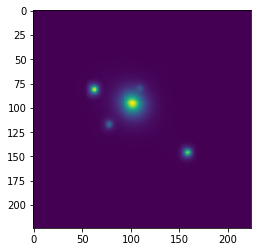

lens parameters: theta_E, e1, e2(ground trouth) 1.3886756524911097 -0.052403262505113464 0.0075037719081661736
lens parameters: theta_E, e1, e2(prediction): 1.2612174 -0.0044625457 -0.21659765
source positions(ground trouth) -0.15220856403492186 -0.18221879563577306
source positions(prediction): -0.13036697 -0.1208365
lens parameters: gamma, center_x, center_y(ground trouth) 2.048483037455909 0.2267685597769971 0.3136191166196627
parameters: gamma, center_x, center_y(prediction): 2.0891583 0.3284655 0.3546649


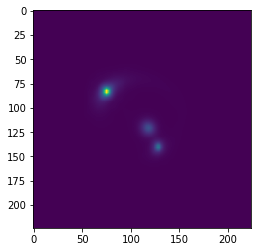

lens parameters: theta_E, e1, e2(ground trouth) 1.1098794348072234 -0.3900484939427203 0.09127772562412012
lens parameters: theta_E, e1, e2(prediction): 1.084536 -0.41114476 0.043374337
source positions(ground trouth) 0.027722633159949 -0.04725465536376303
source positions(prediction): 0.059319824 -0.020845696
lens parameters: gamma, center_x, center_y(ground trouth) 1.988010858982301 -0.12833726659631267 0.0811907914684739
parameters: gamma, center_x, center_y(prediction): 2.0114303 -0.030215582 0.11505147


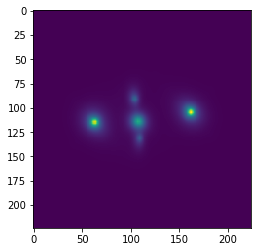

lens parameters: theta_E, e1, e2(ground trouth) 1.631253370285978 0.009904771977419985 0.4597387699445896
lens parameters: theta_E, e1, e2(prediction): 1.3213997 -0.004173292 0.37530607
source positions(ground trouth) -0.0467536700407495 0.014377505358858397
source positions(prediction): -0.018963972 0.034980245
lens parameters: gamma, center_x, center_y(ground trouth) 2.072950969033886 -0.30877821690598584 0.0905238767950418
parameters: gamma, center_x, center_y(prediction): 1.9481375 -0.18057707 0.11169081


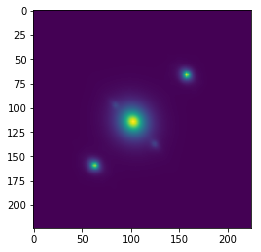

lens parameters: theta_E, e1, e2(ground trouth) 1.2457834890108666 -0.18427099049449125 0.19985800880937846
lens parameters: theta_E, e1, e2(prediction): 1.1413883 -0.1724631 0.08077955
source positions(ground trouth) -0.11659799831227928 -0.11777278138569135
source positions(prediction): -0.06946806 -0.03740761
lens parameters: gamma, center_x, center_y(ground trouth) 2.1187189064262357 0.005801001929482454 0.12888221702716635
parameters: gamma, center_x, center_y(prediction): 2.1069896 0.14707361 0.13010241


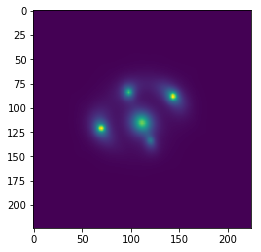

lens parameters: theta_E, e1, e2(ground trouth) 1.1057881139771906 0.2388071345252207 0.00338558352383954
lens parameters: theta_E, e1, e2(prediction): 1.030689 0.2270744 -0.08029758
source positions(ground trouth) 0.10027983789460301 -0.015283409954172362
source positions(prediction): 0.07218394 0.0020627435
lens parameters: gamma, center_x, center_y(ground trouth) 2.020120517980955 0.4249840616704281 -0.13602482035389082
parameters: gamma, center_x, center_y(prediction): 2.0894914 0.5657737 -0.09860347


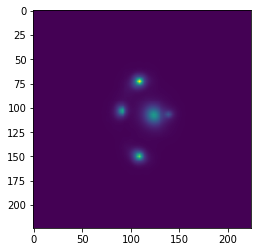

lens parameters: theta_E, e1, e2(ground trouth) 1.2504763047096379 0.2419791987973716 -0.3619697444144208
lens parameters: theta_E, e1, e2(prediction): 1.1435751 0.20441672 -0.30646992
source positions(ground trouth) -0.00582022492737025 -0.08453161637015164
source positions(prediction): 0.031798005 -0.063616276
lens parameters: gamma, center_x, center_y(ground trouth) 2.085650035404772 0.10001298348937833 -0.15441859714009304
parameters: gamma, center_x, center_y(prediction): 2.0663364 0.25159895 -0.14660954


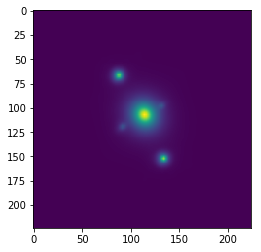

In [15]:
net.cuda()
net.eval()

for batch_idx, (data, theta_E, gamma, center_x, center_y, e1, e2, source_x, source_y, gamma_ext, psi_ext) in enumerate(test_loader):
    img = data
    data = data.float()# theta_E.float(), gamma.float(), center_x.float(), center_y.float(), e1.float(), e2.float(), source_x.float(), source_y.float(), gamma_ext.float(), psi_ext.float()
    data= Variable(data).cuda()# Variable(theta_E).cuda(), Variable(gamma).cuda(), Variable(center_x).cuda(), Variable(center_y).cuda(), Variable(e1).cuda(), Variable(e2).cuda(), Variable(source_x).cuda(), Variable(source_y).cuda(), Variable(gamma_ext).cuda(), Variable(psi_ext).cuda()


    print("lens parameters: theta_E, e1, e2(ground trouth)", theta_E.cpu().numpy()[0][0], e1.cpu().numpy()[0][0], e2.cpu().numpy()[0][0])
    output = net(data)
    print("lens parameters: theta_E, e1, e2(prediction):", output[0][0].detach().cpu().numpy(), output[0][4].detach().cpu().numpy(), output[0][5].detach().cpu().numpy())
    print("source positions(ground trouth)", source_x.cpu().numpy()[0][0], source_y.cpu().numpy()[0][0])
    print("source positions(prediction):", output[0][6].detach().cpu().numpy(), output[0][7].detach().cpu().numpy())
    print("lens parameters: gamma, center_x, center_y(ground trouth)", gamma.cpu().numpy()[0][0], center_x.cpu().numpy()[0][0], center_y.cpu().numpy()[0][0])
    print("parameters: gamma, center_x, center_y(prediction):", output[0][1].detach().cpu().numpy(), output[0][2].detach().cpu().numpy(), output[0][3].detach().cpu().numpy())
    
    plt.imshow(data.cpu().numpy()[0,0,:,:])
    plt.show()

    if batch_idx > 20:
        break

    
    
    
    

In [16]:
net.cuda()
net.eval()

theta_E_target_list = []
theta_E_output_list = []
gamma_target_list = []
gamma_output_list = []
center_x_target_list = []
center_x_output_list = []
center_y_target_list = []
center_y_output_list = []

e1_target_list = []
e1_output_list = []
e2_target_list = []
e2_output_list = []




source_x_target_list = []
source_x_output_list = []
source_y_target_list = []
source_y_output_list = []

for batch_idx, (data, theta_E, gamma, center_x, center_y, e1, e2, source_x, source_y, gamma_ext, psi_ext) in enumerate(test_loader):
    img = data
    data = data.float()#, theta_E.float(), gamma.float(), center_x.float(), center_y.float(), e1.float(), e2.float(), source_x.float(), source_y.float(), gamma_ext.float(), psi_ext.float()
    data= Variable(data).cuda()#Variable(theta_E).cuda(), Variable(gamma).cuda(), Variable(center_x).cuda(), Variable(center_y).cuda(), Variable(e1).cuda(), Variable(e2).cuda(), Variable(source_x).cuda(), Variable(source_y).cuda(), Variable(gamma_ext).cuda(), Variable(psi_ext).cuda()
    
    output = net(data)
    theta_E_target_list.append(theta_E.cpu().numpy()[0][0])
    gamma_target_list.append(gamma.cpu().numpy()[0][0])
    center_x_target_list.append(center_x.cpu().numpy()[0][0])
    center_y_target_list.append(center_y.cpu().numpy()[0][0])
    e1_target_list.append(e1.cpu().numpy()[0][0])
    e2_target_list.append(e2.cpu().numpy()[0][0])
    source_x_target_list.append(source_x.cpu().numpy()[0][0])
    source_y_target_list.append(source_y.cpu().numpy()[0][0])
    
    
    theta_E_output_list.append(output[0][0].detach().cpu().numpy())
    gamma_output_list.append(output[0][1].detach().cpu().numpy())
    center_x_output_list.append(output[0][2].detach().cpu().numpy())
    center_y_output_list.append(output[0][3].detach().cpu().numpy())
    e1_output_list.append(output[0][4].detach().cpu().numpy())
    e2_output_list.append(output[0][5].detach().cpu().numpy())
    source_x_output_list.append(output[0][6].detach().cpu().numpy())
    source_y_output_list.append(output[0][7].detach().cpu().numpy())
    
    
    if batch_idx > 1000:
        break
#     print("lens parameters: theta_E, e1, e2(ground trouth)", theta_E.cpu().numpy()[0][0], e1.cpu().numpy()[0][0], e2.cpu().numpy()[0][0])
#     output = net(data)
#     print("parameters: theta_E, e1, e2(prediction):", output[0][0].detach().cpu().numpy(), output[0][4].detach().cpu().numpy(), output[0][5].detach().cpu().numpy())
#     print("source positions(ground trouth)", source_x.cpu().numpy()[0][0], source_y.cpu().numpy()[0][0])
#     print("source positions(prediction):", output[0][6].detach().cpu().numpy(), output[0][7].detach().cpu().numpy())
#     plt.imshow(data.cpu().numpy()[0,0,:,:])
#     plt.show()

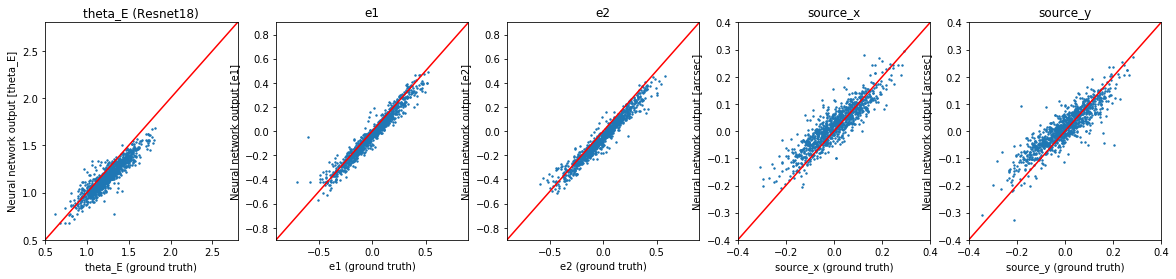

In [17]:
scale= np.linspace(0.5, 2.8 ,100)
plt.figure(figsize=(20, 4))
plt.subplot(1, 5, 1)
plt.scatter(theta_E_target_list, theta_E_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("theta_E (Resnet18)")
plt.xlim(0.5, 2.8)
plt.ylim(0.5, 2.8)
plt.xlabel("theta_E (ground truth)")
plt.ylabel("Neural network output [theta_E]")
#plt.savefig("./" + "scatter_plot.png")

scale= np.linspace(-0.9, 0.9 ,100)
#plt.figure(figsize=(4, 4))
plt.subplot(1, 5, 2)
plt.scatter(e1_target_list, e1_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("e1")
plt.xlim(-0.9, 0.9)
plt.ylim(-0.9, 0.9)
plt.xlabel("e1 (ground truth)")
plt.ylabel("Neural network output [e1]")


scale= np.linspace(-0.9, 0.9 ,100)
plt.subplot(1, 5, 3)
plt.scatter(e2_target_list, e2_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("e2")
plt.xlim(-0.9, 0.9)
plt.ylim(-0.9, 0.9)
plt.xlabel("e2 (ground truth)")
plt.ylabel("Neural network output [e2]")


scale= np.linspace(-0.4, 0.4 ,100)
plt.subplot(1, 5, 4)
plt.scatter(source_x_target_list, source_x_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("source_x")
plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4)
plt.xlabel("source_x (ground truth)")
plt.ylabel("Neural network output [arcsec]")


scale= np.linspace(-0.4, 0.4 ,100)
plt.subplot(1, 5, 5)
plt.scatter(source_y_target_list, source_y_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("source_y")
plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4)
plt.xlabel("source_y (ground truth)")
plt.ylabel("Neural network output [arcsec]")

plt.savefig("./" + loaded_model_path + "scatter_plot.png")

plt.show()

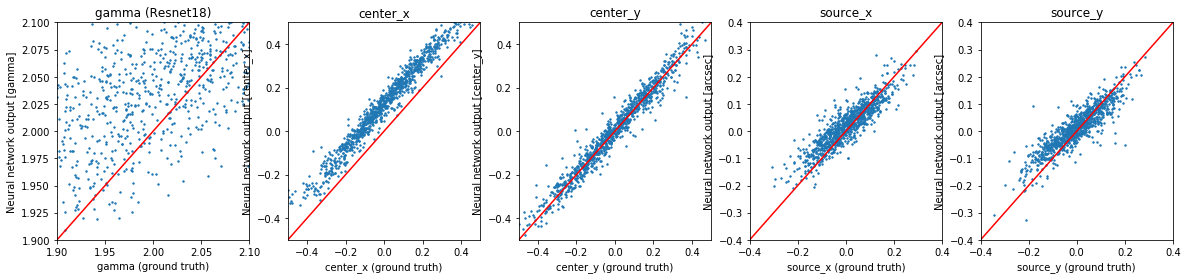

In [18]:
scale= np.linspace(1.9, 2.1 ,100)
plt.figure(figsize=(20, 4))
plt.subplot(1, 5, 1)
plt.scatter(gamma_target_list, gamma_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("gamma (Resnet18)")
plt.xlim(1.9, 2.1)
plt.ylim(1.9, 2.1)
plt.xlabel("gamma (ground truth)")
plt.ylabel("Neural network output [gamma]")
#plt.savefig("./" + "scatter_plot.png")

scale= np.linspace(-0.5, 0.5 ,100)
#plt.figure(figsize=(4, 4))
plt.subplot(1, 5, 2)
plt.scatter(center_x_target_list, center_x_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("center_x")
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.xlabel("center_x (ground truth)")
plt.ylabel("Neural network output [center_x]")


scale= np.linspace(-0.5, 0.5 ,100)
plt.subplot(1, 5, 3)
plt.scatter(center_y_target_list, center_y_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("center_y")
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.xlabel("center_y (ground truth)")
plt.ylabel("Neural network output [center_y]")


scale= np.linspace(-0.4, 0.4 ,100)
plt.subplot(1, 5, 4)
plt.scatter(source_x_target_list, source_x_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("source_x")
plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4)
plt.xlabel("source_x (ground truth)")
plt.ylabel("Neural network output [arcsec]")


scale= np.linspace(-0.4, 0.4 ,100)
plt.subplot(1, 5, 5)
plt.scatter(source_y_target_list, source_y_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("source_y")
plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4)
plt.xlabel("source_y (ground truth)")
plt.ylabel("Neural network output [arcsec]")

plt.savefig("./" + loaded_model_path + "gamma_scatter_plot.png")

plt.show()